# Financial Data Analysis of Microsoft, Tesla, and Apple

### Step 1: import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  #import libraries

In [3]:
import os
print(os.getcwd()) #check kiya file

C:\Users\Jai Varia


### Step 2: Data Loading
We loaded extracted financial data (2022–2024) from 10-K reports of Microsoft, Apple, and Tesla

In [4]:
df = pd.read_csv("C:/Users/Jai Varia/Downloads/financial_data_SEC.xlsx.csv") #csv file load kiya
df.iloc[:9, :7]

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash flow from Operation
0,Microsoft,2024.0,245122,88136,512163.0,243686.0,118548.0
1,Microsoft,2023.0,211915,72361,411976.0,205753.0,87582.0
2,Microsoft,2022.0,198270,72738,364840.0,198298.0,89035.0
3,Apple,2024.0,"391,035","93,736",364980.0,308030.0,118254.0
4,Apple,2023.0,383285,96995,352583.0,290437.0,110543.0
5,Apple,2022.0,394328,99803,352755.0,302083.0,122151.0
6,Tesla,2024.0,97690,7153,122070.0,48390.0,14923.0
7,Tesla,2023.0,96773,14974,106618.0,43009.0,13256.0
8,Tesla,2022.0,81462,12587,82338.0,36440.0,14724.0


In [5]:
df['Total Revenue'] = df['Total Revenue'].replace({',':''}, regex=True).astype(float)

In [6]:
cols = ['Total Revenue','Net Income','Net Income','Total Assets','Total Liabilities','Cash flow from Operation'] #column ko words to integer/float

for col in cols:
    df[col] = pd.to_numeric(df[col],errors='coerce')

### Step 3: Ratios for revenue growth, net income growth and 2 additional ratios
- Debt ratios indicate financial leverage differences.
- Cash Flow/Revenue ratio helps analyze liquidity and efficiency.

In [7]:
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change(fill_method=None) * 100 #formula given by them
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change(fill_method=None) * 100

In [8]:
df['Debt Ratio'] = df['Total Liabilities'] / df['Total Assets'] #extra financial ratios
df['Cash flow/Revenue'] = df['Cash flow from Operation'] / df['Total Revenue']

In [9]:
df[df['Company'].isna()]

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash flow from Operation,Unnamed: 7,Revenue Growth (%),Net Income Growth (%),Debt Ratio,Cash flow/Revenue
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna(subset=['Company'])

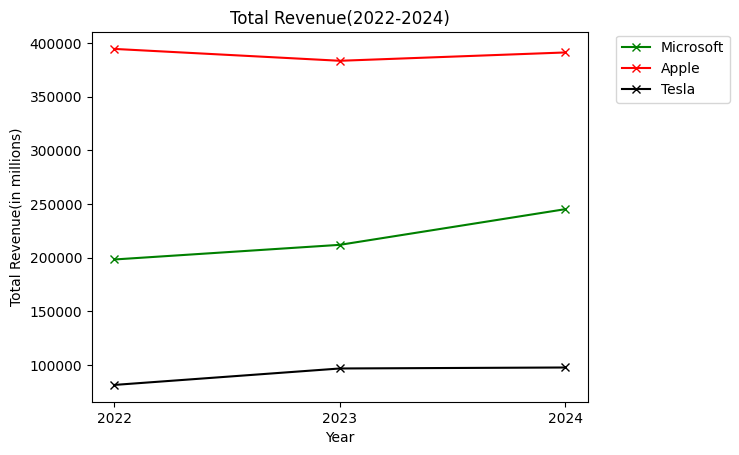

In [11]:
#Converting into chart - Visual Representation

df['Year'] = df['Year'].fillna(0).astype(int)

colors = {'Microsoft':'green', 'Apple':'Red', 'Tesla':'black'}

for company in df['Company'].unique():
    data = df[df['Company'] == company]
    plt.plot(data['Year'],data['Total Revenue'], marker = 'x', label = company, color = colors[company])

plt.title('Total Revenue(2022-2024)')
plt.xlabel('Year')
plt.ylabel('Total Revenue(in millions)')
plt.xticks(df['Year'].unique())
plt.legend(loc='center right', bbox_to_anchor=(1.3,0.9))
plt.show()

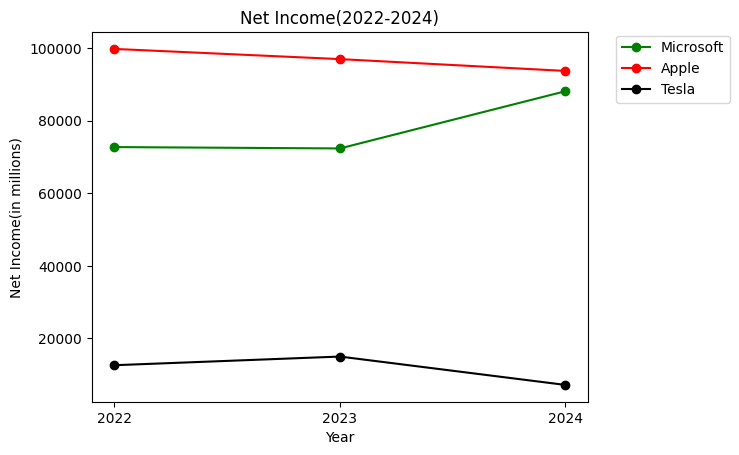

In [24]:
df['Year'] = df['Year'].fillna(0).astype(int)
df.loc[(df['Company'] == 'Apple')&(df['Year'] ==  2024), 'Net Income'] = 93736

for company in df['Company'].unique():
    data = df[df['Company']==company]
    plt.plot(data['Year'], data['Net Income'], marker='o', label = company, color = colors[company])

plt.title('Net Income(2022-2024)')
plt.xlabel('Year')
plt.ylabel('Net Income(in millions)')
plt.xticks(df['Year'].unique())
plt.legend(loc = 'center right', bbox_to_anchor = (1.3, 0.9))
plt.show()


### Step 4: Growth Trends; learnings from the data
- Microsoft shows steady revenue growth with strong profitability.
- Tesla had shown a decline in grwoth for net income after 2023.
- Apple shown a growth in net income after 2023 and shown a stability in revenue from the past 3 fiscal years